# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
import os
from google.colab import drive
from google.colab import files

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
marketing_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset_BMLP/marketing_campaign.csv', sep="\t")
marketing_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
num_rows, num_cols = marketing_df.shape
data_types = marketing_df.dtypes
missing_values = marketing_df.isnull().sum()
nummerical_summary = marketing_df.describe()

In [5]:
print(f"Jumlah baris: {num_rows}")
print(f"Jumlah kolom: {num_cols}")
print()
print("\nTipe data setiap kolom:")
print(data_types)
print()
print("\nStatistik deskriptif untuk variabel numerikal:")
print(nummerical_summary)
print()
print("\nJumlah nilai yang hilang (missing values) di setiap kolom:")
print(missing_values)

Jumlah baris: 2240
Jumlah kolom: 29


Tipe data setiap kolom:
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


Statistik deskriptif un

In [6]:
marketing_df["Income"].fillna(marketing_df["Income"].mean(), inplace=True)

<ipython-input-6-85bcd5f6188a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  marketing_df["Income"].fillna(marketing_df["Income"].mean(), inplace=True)


In [7]:
missing_value = marketing_df.isna().sum()
print(missing_value)

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


<Figure size 1200x600 with 0 Axes>

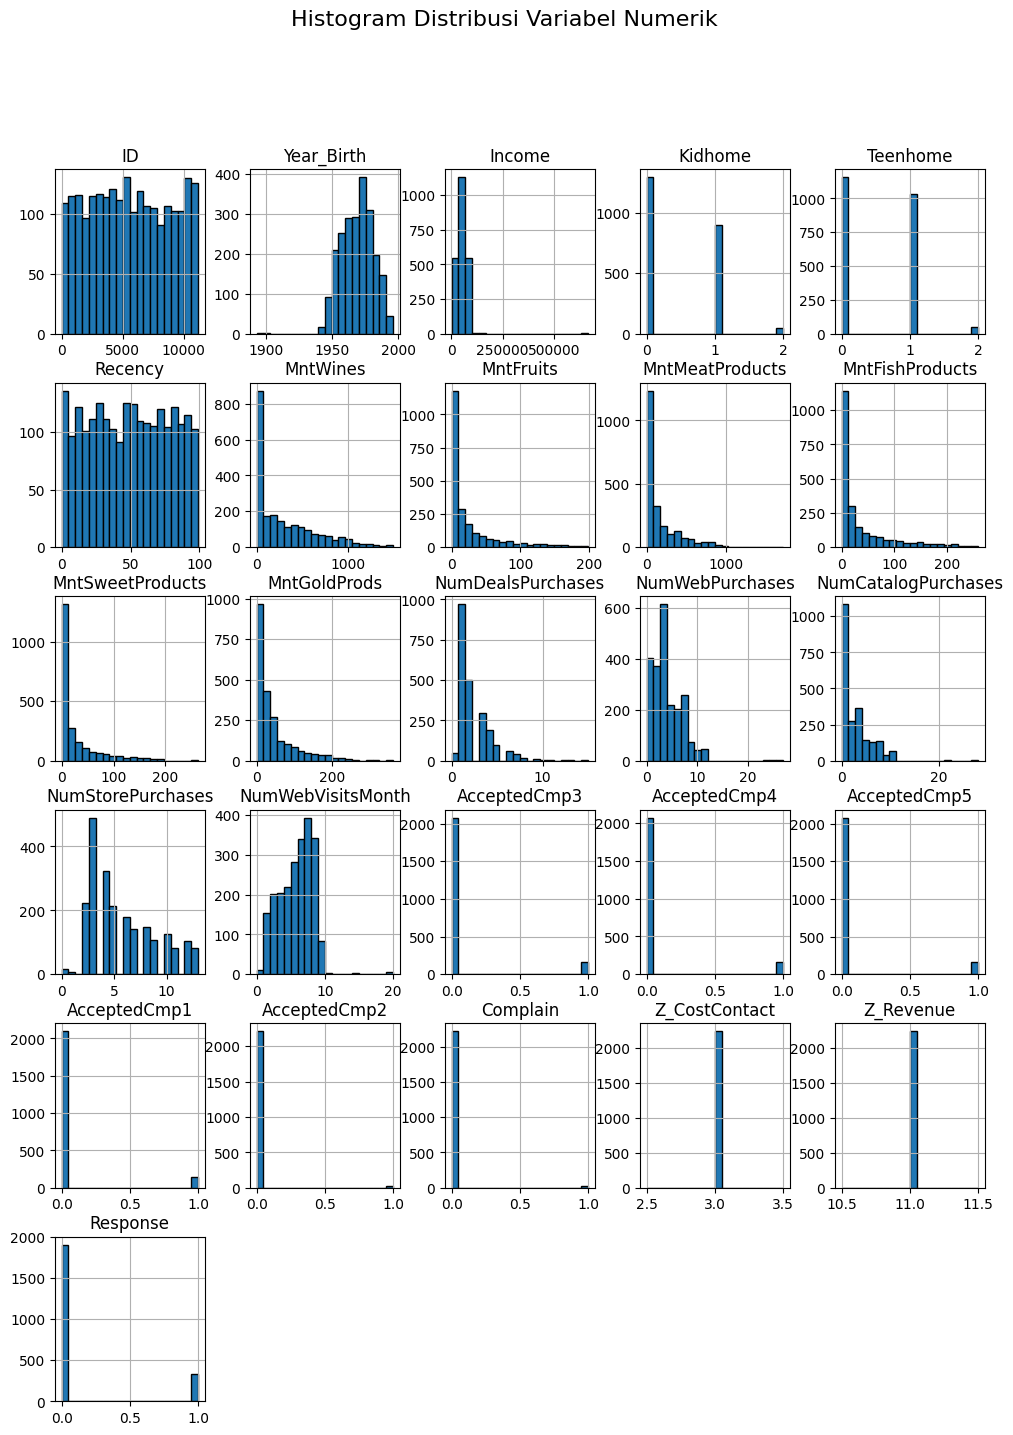

In [8]:
# Visualisasi distribusi variabel numerik
plt.figure(figsize=(12, 6))
marketing_df.hist(figsize=(12, 16), bins=20, edgecolor="black")
plt.suptitle("Histogram Distribusi Variabel Numerik", fontsize=16)
plt.show()

**Visualisasi di atas merupakan visualisasi Distribusi Variabel Numerik dari dataset yang telah diimport**

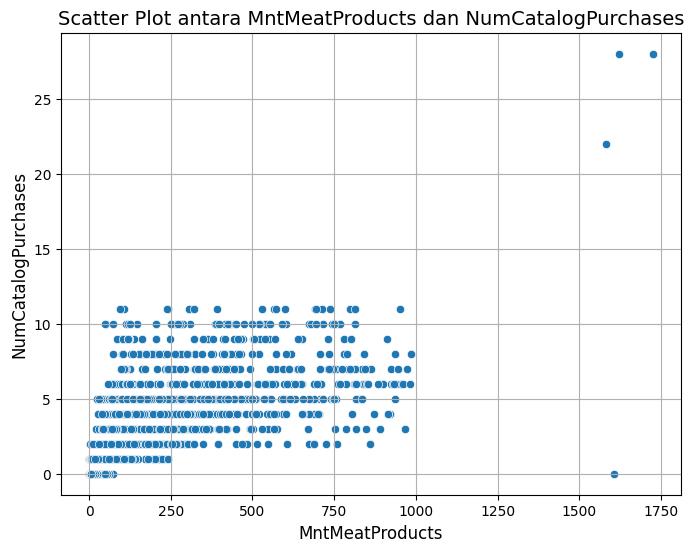

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=marketing_df['MntMeatProducts'], y=marketing_df['NumCatalogPurchases'])

# Menambahkan judul dan label sumbu
plt.title("Scatter Plot antara MntMeatProducts dan NumCatalogPurchases", fontsize=14)
plt.xlabel("MntMeatProducts", fontsize=12)
plt.ylabel("NumCatalogPurchases", fontsize=12)
plt.grid(True)
plt.show()

**Visualisasi di atas merupakan visualisasi Scatter Plot antara variabel yang memiliki hubungan cukup tinggi dari dataset yang telah diimport**

<ipython-input-10-07a34beb2cd1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=marketing_df[col], palette="viridis")
<ipython-input-10-07a34beb2cd1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=marketing_df[col], palette="viridis")


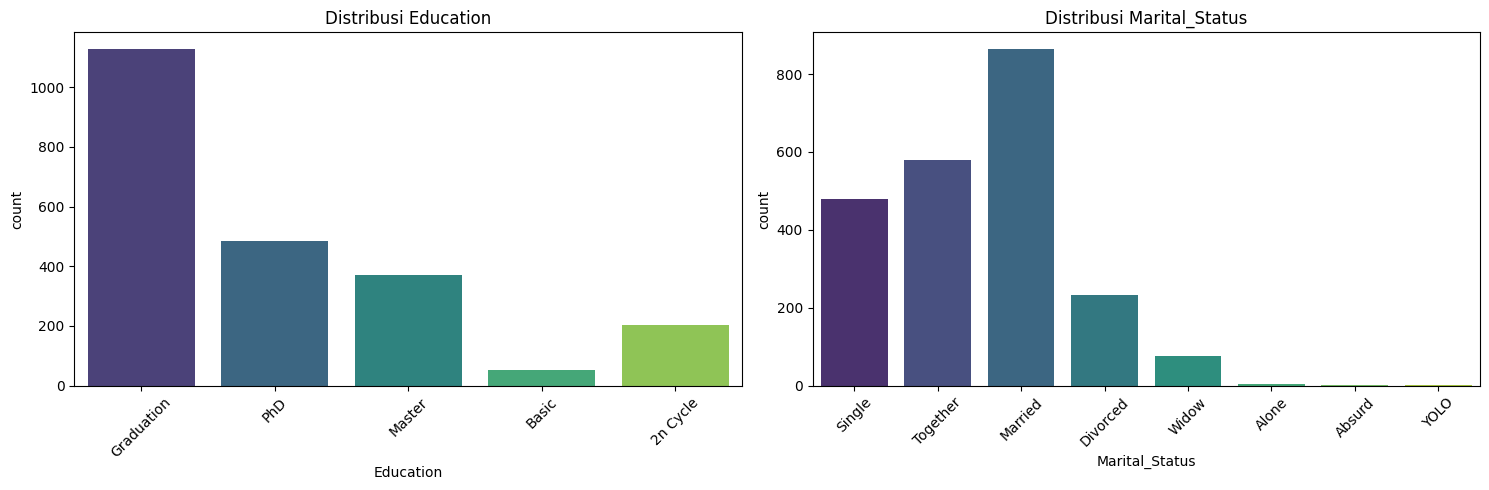

In [10]:
categorical_columns = ["Education", "Marital_Status"]

# Ukuran figure
plt.figure(figsize=(15, 5))

# Loop untuk membuat bar chart masing-masing kategori
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 2, i)  # Menempatkan 2 plot
    sns.countplot(x=marketing_df[col], palette="viridis")
    plt.xticks(rotation=45)  # Rotasi label
    plt.title(f"Distribusi {col}")

plt.tight_layout()
plt.show()

**Visualisasi di atas merupakan visualisasi Distribusi Data Kategorikal menggunakan Bar Chart dari dataset yang telah diimport**

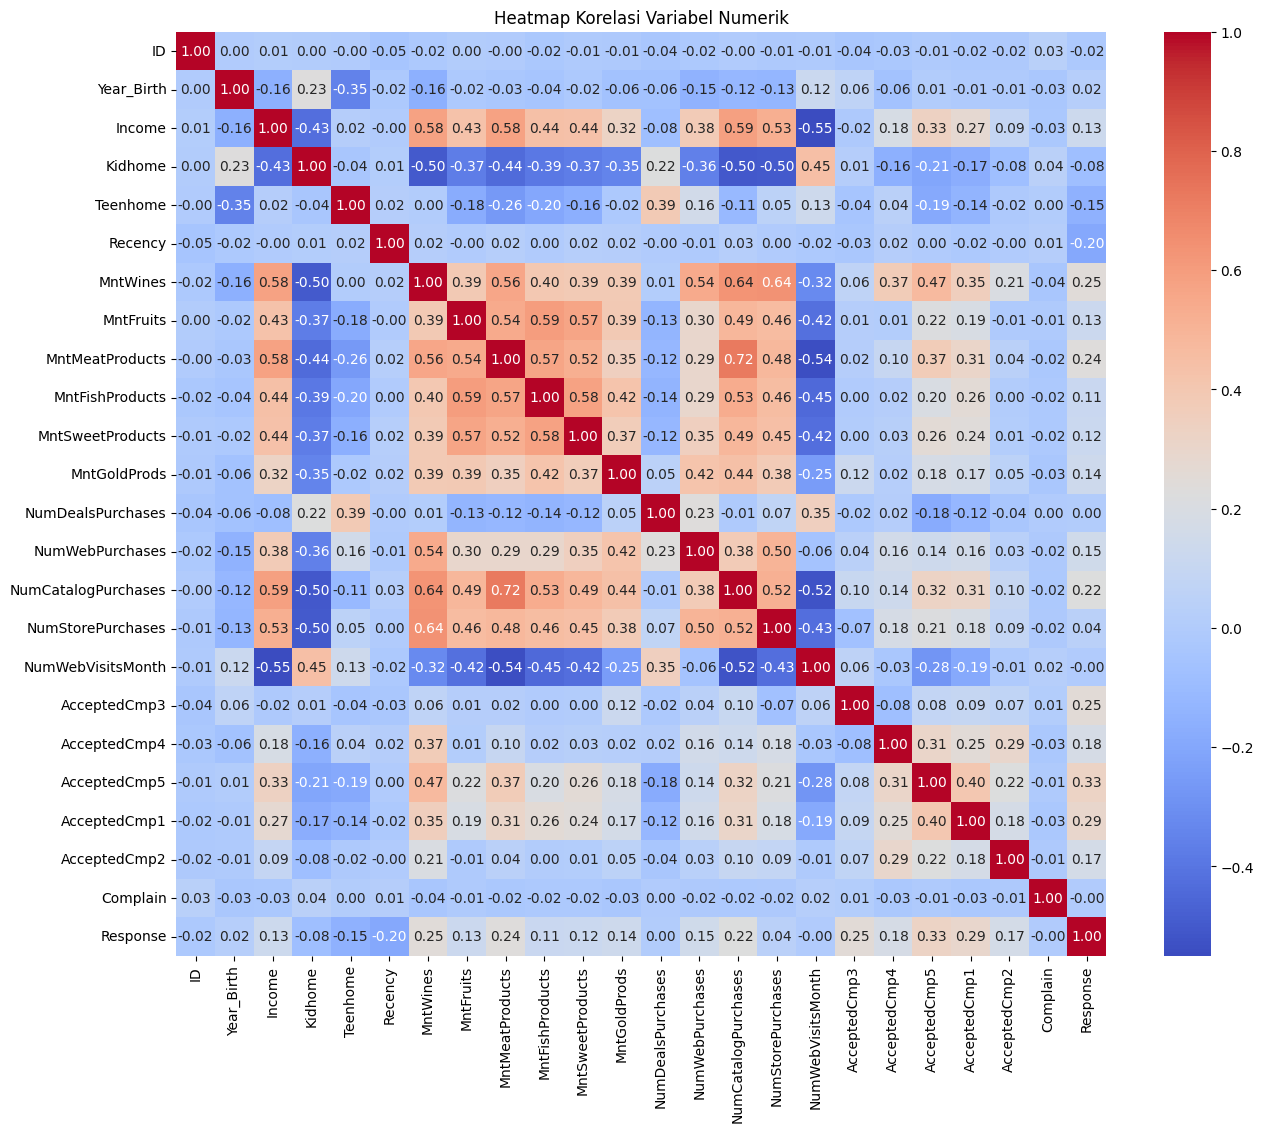

In [11]:
excluded_columns = ["Education", "Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue"]
correlation_matrix = marketing_df.drop(columns=excluded_columns).corr()

# Visualisasi heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()

**Visualisasi di atas merupakan visualisasi Matriks Korelasi dari dataset yang telah diimport**

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [12]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [13]:
marketing_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [14]:
missing_value = marketing_df.isna().sum()
print(missing_value)

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [15]:
print("Jumlah Duplikasi: ", marketing_df.duplicated().sum())

Jumlah Duplikasi:  0


In [16]:
marketing_df["Dt_Customer"] = pd.to_datetime(marketing_df["Dt_Customer"], format="%d-%m-%Y")

In [17]:
excluded_columns = [
    "Dt_Customer",
    "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5",
    "AcceptedCmp1", "AcceptedCmp2", "Complain",
    "Z_CostContact", "Z_Revenue", "Response", "ID"
]
columns_numeric = marketing_df.drop(columns=excluded_columns).columns

In [18]:
# Binning kolom Income
marketing_df["Income_Binned"] = pd.cut(marketing_df["Income"], bins=3, labels=["Low", "Medium", "High"])

In [19]:
# Simpan data sebelum encoding
original_df = marketing_df.copy()

# Pilih kolom kategori yang akan diencode
categorical_cols = ["Education", "Marital_Status", "Income_Binned"]

# Lakukan encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    marketing_df[col] = le.fit_transform(marketing_df[col])
    label_encoders[col] = le  # Simpan encoder untuk pengecekan nanti

# Bandingkan data sebelum dan sesudah
for col in categorical_cols:
    print(f"Mapping Label Encoding untuk {col}:")
    mapping = dict(zip(label_encoders[col].classes_, label_encoders[col].transform(label_encoders[col].classes_)))
    print(mapping)
    print("\nSebelum Encoding:\n", original_df[[col]].head())
    print("\nSesudah Encoding:\n", marketing_df[[col]].head())
    print("="*50)

Mapping Label Encoding untuk Education:
{'2n Cycle': 0, 'Basic': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4}

Sebelum Encoding:
     Education
0  Graduation
1  Graduation
2  Graduation
3  Graduation
4         PhD

Sesudah Encoding:
    Education
0          2
1          2
2          2
3          2
4          4
Mapping Label Encoding untuk Marital_Status:
{'Absurd': 0, 'Alone': 1, 'Divorced': 2, 'Married': 3, 'Single': 4, 'Together': 5, 'Widow': 6, 'YOLO': 7}

Sebelum Encoding:
   Marital_Status
0         Single
1         Single
2       Together
3       Together
4        Married

Sesudah Encoding:
    Marital_Status
0               4
1               4
2               5
3               5
4               3
Mapping Label Encoding untuk Income_Binned:
{'High': 0, 'Low': 1}

Sebelum Encoding:
   Income_Binned
0           Low
1           Low
2           Low
3           Low
4           Low

Sesudah Encoding:
    Income_Binned
0              1
1              1
2              1
3              1
4 

In [20]:
# Cek mapping hasil encoding
for col, le in label_encoders.items():
    print(f"Label Encoding {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

Label Encoding Education: {'2n Cycle': 0, 'Basic': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4}
Label Encoding Marital_Status: {'Absurd': 0, 'Alone': 1, 'Divorced': 2, 'Married': 3, 'Single': 4, 'Together': 5, 'Widow': 6, 'YOLO': 7}
Label Encoding Income_Binned: {'High': 0, 'Low': 1}


In [21]:
# Menghitung Outlier
Q1 = marketing_df[columns_numeric].quantile(0.25)
Q3 = marketing_df[columns_numeric].quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

outliers = marketing_df[(marketing_df[columns_numeric] < batas_bawah) | (marketing_df[columns_numeric] > batas_atas)]
print("Jumlah Outlier:", outliers.shape[0])

Jumlah Outlier: 2240


In [22]:
# Menghitung median untuk setiap kolom numerik
median_income = marketing_df[columns_numeric].median()

# Mengganti outlier dengan median masing-masing kolom
for col in columns_numeric:
    marketing_df.loc[(marketing_df[col] < batas_bawah[col]) | (marketing_df[col] > batas_atas[col]), col] = median_income[col]

<ipython-input-22-197a69e7d126>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '173.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  marketing_df.loc[(marketing_df[col] < batas_bawah[col]) | (marketing_df[col] > batas_atas[col]), col] = median_income[col]


In [23]:
# Normalisasi
scaler = StandardScaler()
data_scaled = scaler.fit_transform(marketing_df[columns_numeric])

In [25]:
marketing_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Income_Binned
0,5524,1957,2,4,58138.0,0,0,2012-09-04,58,635.0,...,0,0,0,0,0,0,3,11,1,1
1,2174,1954,2,4,46344.0,1,1,2014-03-08,38,11.0,...,0,0,0,0,0,0,3,11,0,1
2,4141,1965,2,5,71613.0,0,0,2013-08-21,26,426.0,...,0,0,0,0,0,0,3,11,0,1
3,6182,1984,2,5,26646.0,1,0,2014-02-10,26,11.0,...,0,0,0,0,0,0,3,11,0,1
4,5324,1981,4,3,58293.0,1,0,2014-01-19,94,173.0,...,0,0,0,0,0,0,3,11,0,1


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

### **Model DBSCAN**

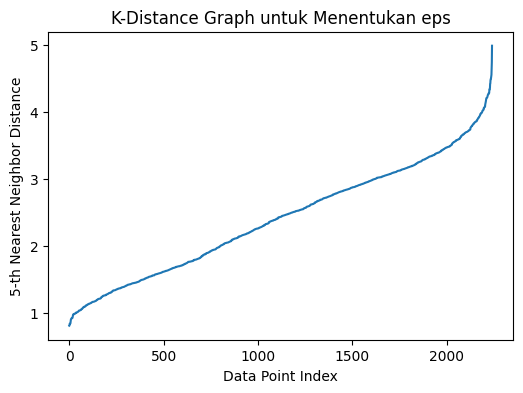

In [ ]:
# Menentukan jumlah tetangga terdekat (k) = min_samples
k = 5
nearest_neighbors = NearestNeighbors(n_neighbors=k)
nearest_neighbors.fit(data_scaled)
distances, indices = nearest_neighbors.kneighbors(data_scaled)

# Ambil jarak ke-tetangga ke-k (jarak terbesar di antara k tetangga)
distances = np.sort(distances[:, k-1], axis=0)

# Visualisasi grafik K-Distance
plt.figure(figsize=(6, 4))
plt.plot(distances)
plt.xlabel("Data Point Index")
plt.ylabel(f"{k}-th Nearest Neighbor Distance")
plt.title("K-Distance Graph untuk Menentukan eps")
plt.show()

In [ ]:
# Hitung perkiraan min_samples
N = len(data_scaled)  # Jumlah data
estimated_min_samples = int(np.log(N))
print(f"Perkiraan min_samples: {estimated_min_samples}")

Perkiraan min_samples: 7


In [ ]:
# Inisialisasi DBSCAN
dbscan = DBSCAN(eps=1, min_samples=7)  # Atur eps dan min_samples sesuai data

# Melatih model DBSCAN
dbscan_clusters = dbscan.fit_predict(data_scaled)

# Menyimpan hasil clustering ke dalam dataframe
marketing_df["Cluster_DBSCAN"] = dbscan_clusters

### **Model KMeans**

In [ ]:
wcss = [] # wcss -> Within Cluster Sum of Squares
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, random_state = 14)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

### **Model DBSCAN**

In [ ]:
# Hanya gunakan data non-outlier untuk evaluasi silhouette score
valid_clusters = marketing_df[marketing_df["Cluster_DBSCAN"] != -1]["Cluster_DBSCAN"].unique()

if len(valid_clusters) > 1:
    score = silhouette_score(data_scaled[marketing_df["Cluster_DBSCAN"] != -1],
                             marketing_df["Cluster_DBSCAN"][marketing_df["Cluster_DBSCAN"] != -1])
    print(f"Silhouette Score untuk DBSCAN: {score:.4f}")
else:
    print("Tidak cukup cluster yang valid untuk menghitung silhouette score.")

Silhouette Score untuk DBSCAN: 0.6158


### **Model KMeans**

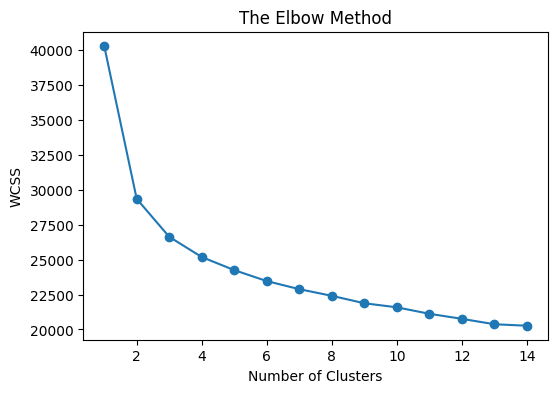

In [ ]:
# Visualisasi Elbow Method
plt.figure(figsize=(6, 4))
plt.plot(range(1, 15), wcss, marker='o', linestyle='-')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
optimal_k = 2  # Tentukan berdasarkan elbow method
kmeans = KMeans(n_clusters=optimal_k, n_init='auto', random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=2, random_state=42)

In [ ]:
print("Silhouette Score untuk KMeans:", silhouette_score(data_scaled, kmeans.labels_, metric='euclidean'))

Silhouette Score untuk KMeans: 0.25517122514116325


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

### **Model DBSCAN**

In [ ]:
# Hapus fitur dengan varians rendah
selector = VarianceThreshold(threshold=0.01)  # Hanya menyimpan fitur dengan varians > 0.01
data_selected = selector.fit_transform(data_scaled)

# PCA untuk mengurangi dimensi menjadi 95% dari informasi asli
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data_selected)

print(f"Dimensi awal: {data_scaled.shape[1]}, setelah Feature Selection: {data_pca.shape[1]}")

Dimensi awal: 18, setelah Feature Selection: 15


In [ ]:
# Inisialisasi DBSCAN
dbscan = DBSCAN(eps=4, min_samples=7)  # Atur eps dan min_samples sesuai data

# Melatih model DBSCAN
dbscan_clusters_pca = dbscan.fit_predict(data_pca)

# Menyimpan hasil clustering ke dalam dataframe
marketing_df["PCA_Cluster_DBSCAN"] = dbscan_clusters_pca

In [ ]:
valid_clusters = marketing_df[marketing_df["Cluster_DBSCAN"] != -1]["Cluster_DBSCAN"].unique()

if len(valid_clusters) > 1:
    score = silhouette_score(data_pca[marketing_df["Cluster_DBSCAN"] != -1],
                             marketing_df["Cluster_DBSCAN"][marketing_df["Cluster_DBSCAN"] != -1])
    print(f"Silhouette Score untuk DBSCAN: {score:.4f}")
else:
    print("Tidak cukup cluster yang valid untuk menghitung silhouette score.")

Silhouette Score untuk DBSCAN: 0.6460


### **Model KMeans**

In [ ]:
# Hapus fitur dengan varians rendah
selector_kmeans = VarianceThreshold(threshold=0.01)  # Hanya menyimpan fitur dengan varians > 0.01
data_kmeans = selector.fit_transform(data_scaled)

# PCA untuk mengurangi dimensi menjadi 95% dari informasi asli
pca = PCA(n_components=0.95)
data_pca_kmeans = pca.fit_transform(data_kmeans)

print(f"Dimensi awal: {data_pca_kmeans.shape[1]}, setelah Feature Selection: {data_pca_kmeans.shape[1]}")

Dimensi awal: 15, setelah Feature Selection: 15


In [ ]:
wcss = [] # wcss -> Within Cluster Sum of Squares
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, random_state = 14)
    kmeans.fit(data_pca_kmeans)
    wcss.append(kmeans.inertia_)

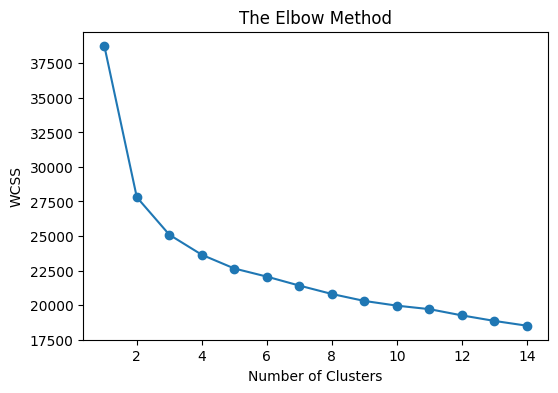

In [ ]:
# Visualisasi Elbow Method
plt.figure(figsize=(6, 4))
plt.plot(range(1, 15), wcss, marker='o', linestyle='-')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
optimal_k = 2  # Tentukan berdasarkan elbow method
kmeans = KMeans(n_clusters=optimal_k, n_init='auto', random_state=42)
kmeans.fit(data_pca_kmeans)
kmeans_labels = kmeans.labels_

In [ ]:
print("Silhouette Score untuk KMeans:", silhouette_score(data_pca_kmeans, kmeans.labels_, metric='euclidean'))

Silhouette Score untuk KMeans: 0.26295173338407035


In [ ]:
marketing_df["Cluster_KMeans"] = kmeans_labels

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

### **Model DBSCAN**

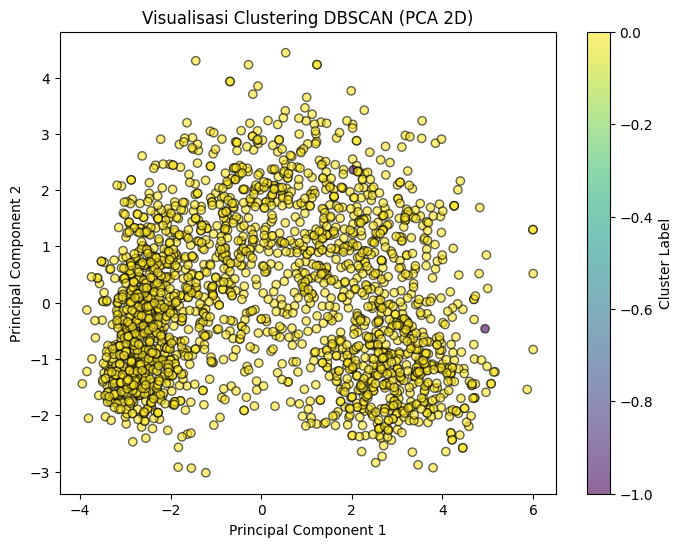

In [ ]:
pca_2d = PCA(n_components=2)
data_pca_2d = pca_2d.fit_transform(data_pca)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_pca_2d[:, 0], data_pca_2d[:, 1], c=dbscan_clusters_pca, cmap="viridis", alpha=0.6, edgecolors='k')
plt.colorbar(label="Cluster Label")
plt.title("Visualisasi Clustering DBSCAN (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

<ipython-input-42-530325b9fe35>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=marketing_df["PCA_Cluster_DBSCAN"], palette="viridis")


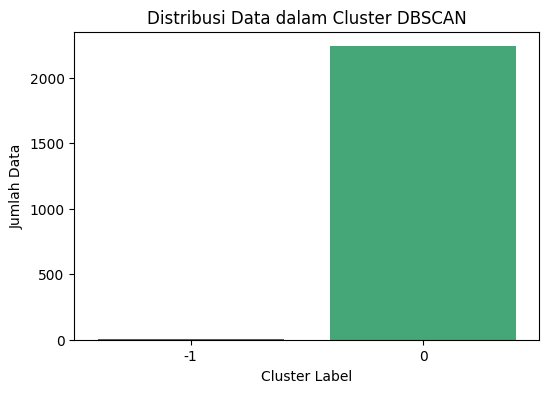

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=marketing_df["PCA_Cluster_DBSCAN"], palette="viridis")
plt.title("Distribusi Data dalam Cluster DBSCAN")
plt.xlabel("Cluster Label")
plt.ylabel("Jumlah Data")
plt.xticks(rotation=0)
plt.show()

### **Model KMeans**

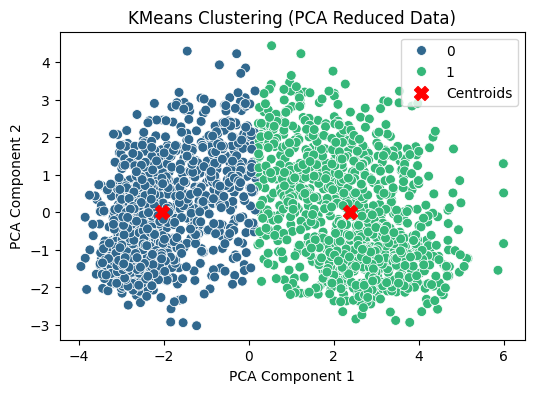

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data_pca_kmeans[:, 0], y=data_pca_kmeans[:, 1], hue=kmeans_labels, palette="viridis", s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', s=100, label="Centroids")
plt.title("KMeans Clustering (PCA Reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [ ]:
cluster_summary = marketing_df.groupby("Cluster_KMeans").mean()
print("\nRata-rata fitur per cluster:")
print(cluster_summary)


Rata-rata fitur per cluster:
                         ID   Year_Birth  Education  Marital_Status  \
Cluster_KMeans                                                        
0               5580.018182  1970.713223   2.523967        3.701653   
1               5606.423301  1966.776699   2.634951        3.763107   

                      Income   Kidhome  Teenhome  \
Cluster_KMeans                                     
0               36752.147333  0.740496  0.523140   
1               69130.913359  0.096117  0.486408   

                                 Dt_Customer    Recency    MntWines  ...  \
Cluster_KMeans                                                       ...   
0              2013-07-28 22:23:36.198347264  48.890909   73.676446  ...   
1              2013-06-18 16:00:27.961165056  49.366019  534.739806  ...   

                AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
Cluster_KMeans                                                       
0                   0.000826   

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

### **Model DBSCAN**

In [ ]:
cluster_counts = marketing_df['PCA_Cluster_DBSCAN'].value_counts()
print("Jumlah sampel per cluster:")
print(cluster_counts)

Jumlah sampel per cluster:
PCA_Cluster_DBSCAN
 0    2238
-1       2
Name: count, dtype: int64


In [ ]:
total_samples = len(marketing_df)
cluster_proportions = cluster_counts / total_samples
print("\nProporsi tiap cluster:")
print(cluster_proportions)


Proporsi tiap cluster:
PCA_Cluster_DBSCAN
 0    0.999107
-1    0.000893
Name: count, dtype: float64


In [ ]:
cluster_summary = marketing_df.groupby("PCA_Cluster_DBSCAN").agg(['mean', 'std'])
print("\nRingkasan statistik tiap cluster:")
print(cluster_summary)


Ringkasan statistik tiap cluster:
                             ID                Year_Birth             \
                           mean          std         mean        std   
PCA_Cluster_DBSCAN                                                     
-1                  4099.500000  5574.122756  1958.000000  18.384776   
 0                  5593.493744  3245.667298  1968.912869  11.688362   

                   Education           Marital_Status                  Income  \
                        mean       std           mean       std          mean   
PCA_Cluster_DBSCAN                                                              
-1                  4.000000  0.000000       5.500000  0.707107  59357.500000   
 0                  2.573727  0.851866       3.728329  1.075351  51633.701534   

                                  ... Z_Revenue       Response            \
                             std  ...      mean  std      mean       std   
PCA_Cluster_DBSCAN                ...         

In [ ]:
num_noise_points = (marketing_df['PCA_Cluster_DBSCAN'] == -1).sum()
print(f"\nJumlah noise points (outliers): {num_noise_points}")


Jumlah noise points (outliers): 2


In [ ]:
for cluster in sorted(marketing_df['PCA_Cluster_DBSCAN'].unique()):
    if cluster == -1:
        print("\nCluster -1 (Noise / Outlier)")
    else:
        print(f"\nCluster {cluster}")
    cluster_data = marketing_df[marketing_df['PCA_Cluster_DBSCAN'] == cluster]
    print(cluster_data.describe())


Cluster -1 (Noise / Outlier)
                ID   Year_Birth  Education  Marital_Status        Income  \
count     2.000000     2.000000        2.0        2.000000      2.000000   
mean   4099.500000  1958.000000        4.0        5.500000  59357.500000   
min     158.000000  1945.000000        4.0        5.000000  47111.000000   
25%    2128.750000  1951.500000        4.0        5.250000  53234.250000   
50%    4099.500000  1958.000000        4.0        5.500000  59357.500000   
75%    6070.250000  1964.500000        4.0        5.750000  65480.750000   
max    8041.000000  1971.000000        4.0        6.000000  71604.000000   
std    5574.122756    18.384776        0.0        0.707107  17319.166392   

       Kidhome  Teenhome          Dt_Customer    Recency    MntWines  ...  \
count      2.0  2.000000                    2   2.000000    2.000000  ...   
mean       0.0  0.500000  2013-04-13 12:00:00  19.000000  470.000000  ...   
min        0.0  0.000000  2012-09-08 00:00:00   3.0000

Hasil interpretasi:
1. Cluster 1:
- Jumlah sampel: 2.238 (99.91% dari total data)
- Rata-rata Pendapatan: 51.634
- Rata-rata Usia: 49 tahun
- Dominasi Pendidikan: Mayoritas tingkat pendidikan ke-2
- Status Pernikahan: Mayoritas kategori 3
- Rata-rata total pembelian: 14 kali
- Jumlah anak: Rata-rata 0-1 anak
- Respon terhadap kampanye pemasaran: Relatif rendah (~14.88%)
- Jumlah keluhan: Sangat rendah (~0.94%)

**Analisis:**
Cluster ini mencerminkan kelompok pelanggan dengan pendapatan menengah, usia sekitar 49 tahun, dan cenderung stabil dalam hubungan pernikahan. Pembelian mereka relatif moderat, dan mereka memiliki keterlibatan rendah terhadap kampanye pemasaran.

1. Cluster 1:
- Jumlah sampel: 2 (0.09% dari total data)
- Rata-rata Pendapatan: 59.357
- Rata-rata Usia: 65 tahun
- Dominasi Pendidikan: Mayoritas tingkat pendidikan ke-2
- Status Pernikahan: Mayoritas kategori 4
- Total pembelian: 19 kali
- Respon terhadap kampanye pemasaran: 50%
- Jumlah keluhan: 0%

**Analisis:**
Dua individu dalam cluster ini merupakan outlier, memiliki usia yang lebih tua, pendapatan lebih tinggi, serta tingkat pembelian lebih besar dibandingkan mayoritas pelanggan lainnya. Mereka juga lebih responsif terhadap kampanye pemasaran dibandingkan kelompok utama.

### **Model KMeans**

<ipython-input-50-5202c1d3563f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=marketing_df["Cluster_KMeans"], palette="viridis")


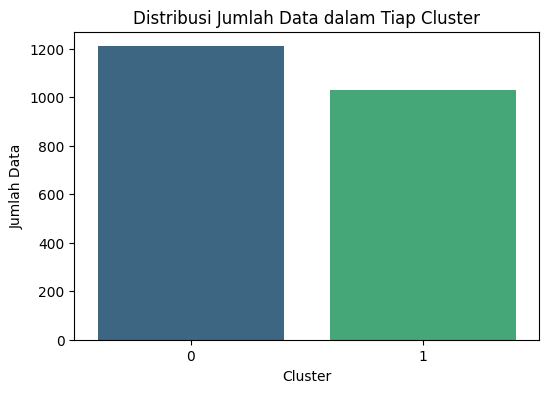

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=marketing_df["Cluster_KMeans"], palette="viridis")
plt.title("Distribusi Jumlah Data dalam Tiap Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")
plt.show()

In [ ]:
# Rata-rata Income per Cluster
income_mean = marketing_df.groupby("Cluster_KMeans")["Income"].mean()
print("\nRata-rata Income per Cluster:\n", income_mean)


Rata-rata Income per Cluster:
 Cluster_KMeans
0    36752.147333
1    69130.913359
Name: Income, dtype: float64


<ipython-input-52-46af2b1ae8af>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster_KMeans", y="Income", data=marketing_df, palette="viridis")


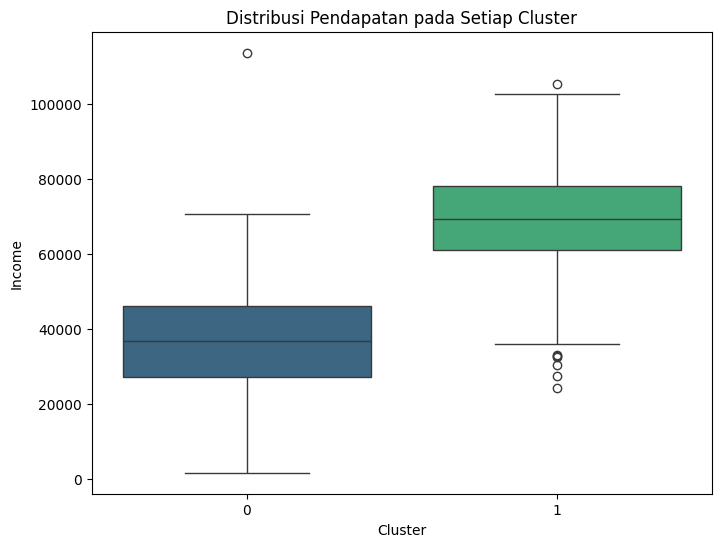

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Cluster_KMeans", y="Income", data=marketing_df, palette="viridis")
plt.title("Distribusi Pendapatan pada Setiap Cluster")
plt.xlabel("Cluster")
plt.ylabel("Income")
plt.show()

In [ ]:
print(marketing_df["Income"].value_counts())

Income
52247.251354    24
7500.000000     12
51741.500000     8
35860.000000     4
67445.000000     3
                ..
74250.000000     1
40760.000000     1
41452.000000     1
6835.000000      1
52869.000000     1
Name: count, Length: 1968, dtype: int64


<ipython-input-54-b3f1b8f9032f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster_KMeans", y="Year_Birth", data=marketing_df, palette="coolwarm", ax=axes[0])
<ipython-input-54-b3f1b8f9032f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster_KMeans", y="Income", data=marketing_df, palette="coolwarm", ax=axes[1])


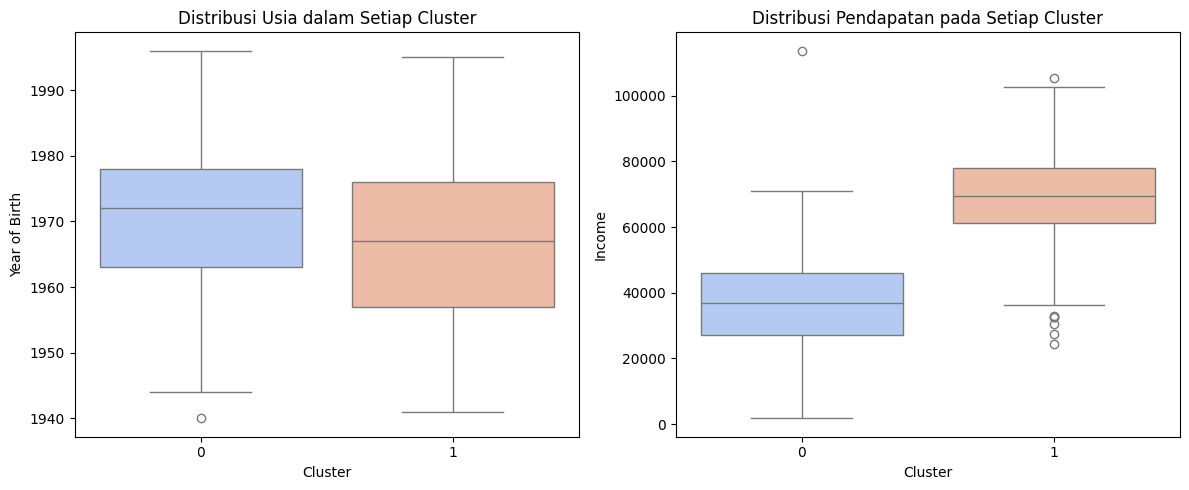

In [ ]:
# Tambahkan kolom total pembelian
marketing_df["MntTotal"] = marketing_df[["NumStorePurchases", "NumCatalogPurchases", "NumWebPurchases", "NumDealsPurchases"]].sum(axis=1)

# Visualisasi distribusi umur dan total pembelian
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x="Cluster_KMeans", y="Year_Birth", data=marketing_df, palette="coolwarm", ax=axes[0])
axes[0].set_title("Distribusi Usia dalam Setiap Cluster")
axes[0].set_xlabel("Cluster")
axes[0].set_ylabel("Year of Birth")

sns.boxplot(x="Cluster_KMeans", y="Income", data=marketing_df, palette="coolwarm", ax=axes[1])
axes[1].set_title("Distribusi Pendapatan pada Setiap Cluster")
axes[1].set_xlabel("Cluster")
axes[1].set_ylabel("Income")

plt.tight_layout()
plt.show()

<ipython-input-55-9060c04e4e92>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster_KMeans", y="Year_Birth", data=marketing_df, palette="coolwarm", ax=axes[0])
<ipython-input-55-9060c04e4e92>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster_KMeans", y="MntTotal", data=marketing_df, palette="coolwarm", ax=axes[1])


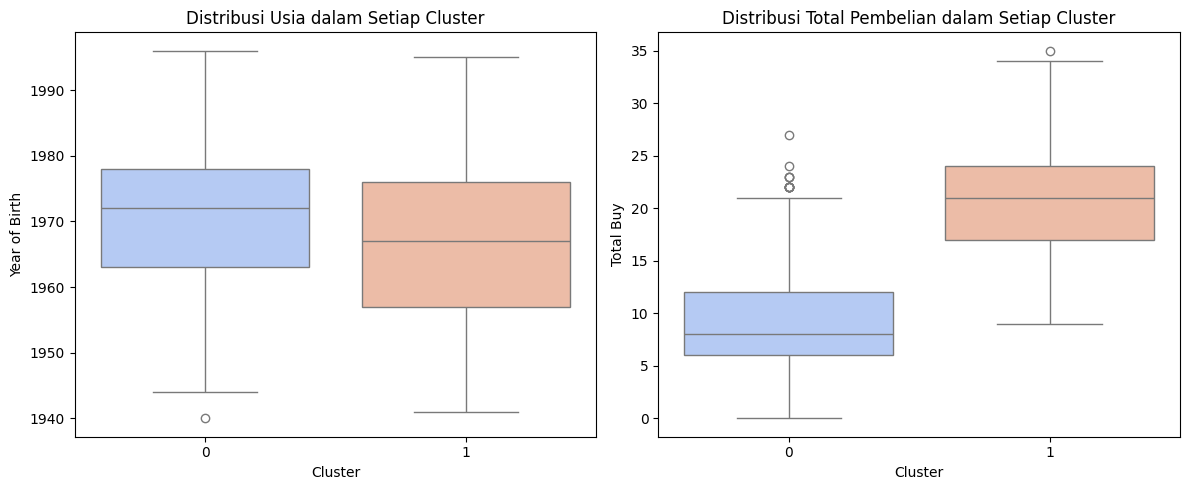

In [ ]:
# Tambahkan kolom total pembelian
marketing_df["MntTotal"] = marketing_df[["NumStorePurchases", "NumCatalogPurchases", "NumWebPurchases", "NumDealsPurchases"]].sum(axis=1)

# Visualisasi distribusi umur dan total pembelian
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x="Cluster_KMeans", y="Year_Birth", data=marketing_df, palette="coolwarm", ax=axes[0])
axes[0].set_title("Distribusi Usia dalam Setiap Cluster")
axes[0].set_xlabel("Cluster")
axes[0].set_ylabel("Year of Birth")

sns.boxplot(x="Cluster_KMeans", y="MntTotal", data=marketing_df, palette="coolwarm", ax=axes[1])
axes[1].set_title("Distribusi Total Pembelian dalam Setiap Cluster")
axes[1].set_xlabel("Cluster")
axes[1].set_ylabel("Total Buy")

plt.tight_layout()
plt.show()

In [ ]:
# Rata-rata Income per Cluster
income_mean = marketing_df.groupby("Cluster_KMeans")["Year_Birth"].mean()
print("\nRata-rata Tahun Kelahiran per Cluster:\n", income_mean)


Rata-rata Tahun Kelahiran per Cluster:
 Cluster_KMeans
0    1970.713223
1    1966.776699
Name: Year_Birth, dtype: float64


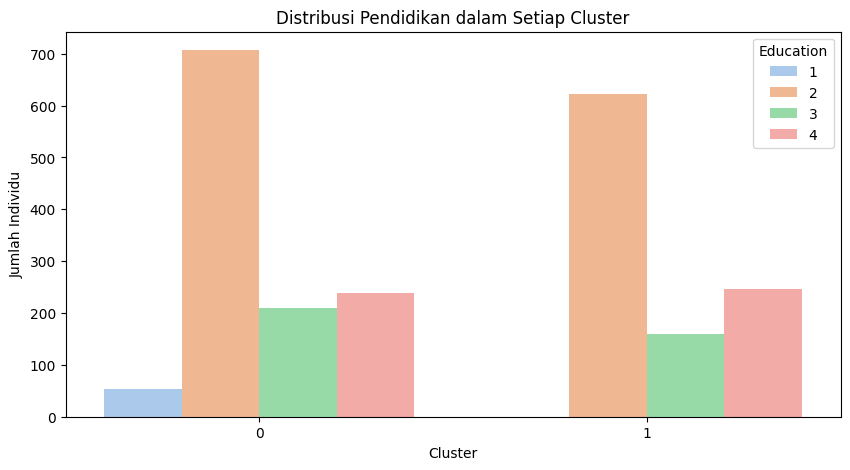

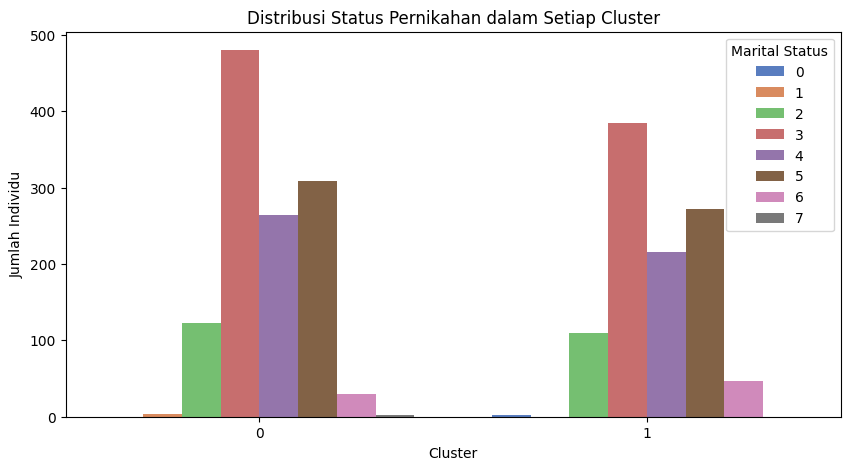

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Cluster_KMeans", hue="Education", data=marketing_df, palette="pastel")
plt.title("Distribusi Pendidikan dalam Setiap Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Individu")
plt.legend(title="Education")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x="Cluster_KMeans", hue="Marital_Status", data=marketing_df, palette="muted")
plt.title("Distribusi Status Pernikahan dalam Setiap Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Individu")
plt.legend(title="Marital Status")
plt.show()

Hasil interpretasi:
1. Cluster 1:
- Pendapatan rendah
- Rata-rata income: 36752.147333
- Usia lebih muda
- Total pembelian rendah
- Didominasi pendidikan Graduation
- Didominasi status pernikahan Married

**Analisis:**
Cluster 1 menunjukan pelanggan dengan usia yang lebih muda, dengan pendapatan yang lebih rendah dengan total pembelian yang rendah, meskipun terdapat kesamaan yaitu didominasi lulusan dengan status menikah.

2. Cluster 2:
- Pendapatan tinggi
- Rata-rata income: 69130.913359
- Usia lebih tua
- Total pembelian tinggi
- Didominasi pendidikan Graduation
- Didominasi status pernikahan Married

**Analisis:**
Cluster 2 menunjukan pelanggan dengan usia yang lebih tua, dengan pendapatan yang lebih tinggi dengan total pembelian yang juga tinggi, meskipun terdapat kesamaan yaitu didominasi lulusan dengan status menikah.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
marketing_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Income_Binned,Cluster_DBSCAN,PCA_Cluster_DBSCAN,Cluster_KMeans,MntTotal
0,5524,1957,2,4,58138.0,0,0,2012-09-04,58,635.0,...,0,0,3,11,1,1,-1,0,1,25
1,2174,1954,2,4,46344.0,1,1,2014-03-08,38,11.0,...,0,0,3,11,0,1,-1,0,0,6
2,4141,1965,2,5,71613.0,0,0,2013-08-21,26,426.0,...,0,0,3,11,0,1,-1,0,1,21
3,6182,1984,2,5,26646.0,1,0,2014-02-10,26,11.0,...,0,0,3,11,0,1,-1,0,0,8
4,5324,1981,4,3,58293.0,1,0,2014-01-19,94,173.0,...,0,0,3,11,0,1,-1,0,1,19


In [ ]:
marketing_df.to_csv("hasil_clustering.csv", index=False)

In [ ]:
files.download("hasil_clustering.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>